In [69]:
from easyimages import EasyImageList
from tkinter import *
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import os

import numpy as np
import os
from typing import List
import pandas as pd
from PIL import Image
import seaborn as sns

from scipy.stats import mode

import cv2
import numpy as np
from skimage import io
import pandas as pd

In [2]:
path = "C:/Users/Justin/Desktop/AI CV/Explainable-AI/data"

In [3]:
onlyfiles = [os.path.join(dirpath,f) for (dirpath, dirnames, filenames) in os.walk(path) for f in filenames]

In [4]:
# Split the file paths into three sets
train_paths = [path for path in onlyfiles if 'train' in path]
test_paths = [path for path in onlyfiles if 'test' in path]
val_paths = [path for path in onlyfiles if 'val' in path]

In [5]:
def get_leaf_folders(path: str) -> List[str]:
    """
    Recursively get a list of all leaf folders (i.e. folders with no subfolders) in a directory and its subdirectories.

    Args:
        path: The path of the directory to search for leaf folders.

    Returns:
        A list of strings, where each string is the full path to a leaf folder in the specified directory or its subdirectories.
    """
    leaf_folders = []
    for f in os.listdir(path):
        full_path = os.path.join(path, f)
        if os.path.isdir(full_path):
            if len(os.listdir(full_path)) == 0:
                # Ignore empty folders
                continue
            subfolders = get_leaf_folders(full_path)
            if len(subfolders) == 0:
                leaf_folders.append(full_path)
            else:
                leaf_folders.extend(subfolders)
    print(leaf_folders)
    return leaf_folders

In [6]:
import os
from typing import List


def get_leaf_folders(path: str) -> List[str]:
    """
    Recursively get a list of all leaf folders (i.e. folders with no subfolders) in a directory and its subdirectories.

    Args:
        path: The path of the directory to search for leaf folders.

    Returns:
        A list of strings, where each string is the full path to a leaf folder in the specified directory or its subdirectories.
    """
    leaf_folders = set()
    for f in os.listdir(path):
        full_path = os.path.join(path, f)
        if os.path.isdir(full_path):
            if len(os.listdir(full_path)) == 0:
                # Ignore empty folders
                continue
            subfolders = get_leaf_folders(full_path)
            if len(subfolders) == 0:
                leaf_folders.add(full_path)
            else:
                leaf_folders.update(subfolders)
    return sorted(list(leaf_folders))


In [7]:
l_folders = get_leaf_folders(path=path)
l_folders

['C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\test\\bacteria',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\test\\normal',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\test\\virus',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\train\\bacteria',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\train\\normal',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\train\\virus',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\val\\bacteria',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\val\\normal',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\val\\virus']

In [8]:
from typing import List
import os


def create_EIL_from_directory(subfolder:str , sample: int = 500, size: int = 50) -> EasyImageList:
    """
    Create an EasyImageList object from all image files in a directory and its subdirectories.

    Args:
        path: The path of the directory to search for image files.
        sample: The maximum number of images to include in the EasyImageList.
        size: The size of the thumbnails in the HTML visualization.

    Returns:
        An EasyImageList object created from all image files in the specified directory and its subdirectories.
    """
    # Create an EasyImageList object from the subfolder
    EIL = EasyImageList.from_folder(subfolder)
    EIL.symlink_images()
    EIL.html(sample=sample, size=size)
    
    return

In [9]:
create_EIL_from_directory(subfolder=l_folders[0],sample=50,size=68)


In [10]:
create_EIL_from_directory(subfolder=l_folders[1],sample=50,size=68)

In [11]:
create_EIL_from_directory(subfolder=l_folders[2],sample=50,size=68)

In [12]:
df = pd.DataFrame({'file_path': onlyfiles})
df

,file_path
0,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...
1,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...
2,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...
3,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...
4,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...
...,...
5851,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...
5852,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...
5853,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...
5854,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...


In [13]:
def get_label(file_path):
    if "bacteria" in file_path:
        return "bacteria"
    elif "virus" in file_path:
        return "virus"
    elif "normal" in file_path:
        return "normal"
    else:
        return None
    
def get_data_use(file_path):
    if "train" in file_path:
        return "train"
    elif "test" in file_path:
        return "test"
    elif "val" in file_path:
        return "val"
    else:
        return None

def get_image_size(file_path):
    with Image.open(file_path) as img:
        return img.size
    

In [14]:
df["label"] = df["file_path"].apply(get_label)
df["usage"] = df["file_path"].apply(get_data_use)
df["size"] = df["file_path"].apply(get_image_size)
df

,file_path,label,usage,size
0,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,bacteria,test,"(1106, 762)"
1,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,bacteria,test,"(1024, 680)"
2,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,bacteria,test,"(1128, 624)"
3,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,bacteria,test,"(904, 552)"
4,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,bacteria,test,"(880, 536)"
...,...,...,...,...
5851,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,normal,val,"(1564, 1302)"
5852,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,virus,val,"(1216, 672)"
5853,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,virus,val,"(1200, 784)"
5854,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,virus,val,"(984, 624)"


In [15]:
df["aspect_ratio"] = df["size"].apply(lambda x: x[0] / x[1])

In [16]:
%matplotlib inline

In [17]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [18]:
plt.style.use('seaborn-v0_8-muted')

In [19]:
def plot_counts(df, tar_var):   
    f,ax=plt.subplots(1,2,figsize=(18,8))
    df[tar_var].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title(tar_var)
    ax[0].set_ylabel('')
    sns.countplot(data=df, x= df[tar_var],ax=ax[1])
    ax[1].set_title(tar_var)
    plt.show()

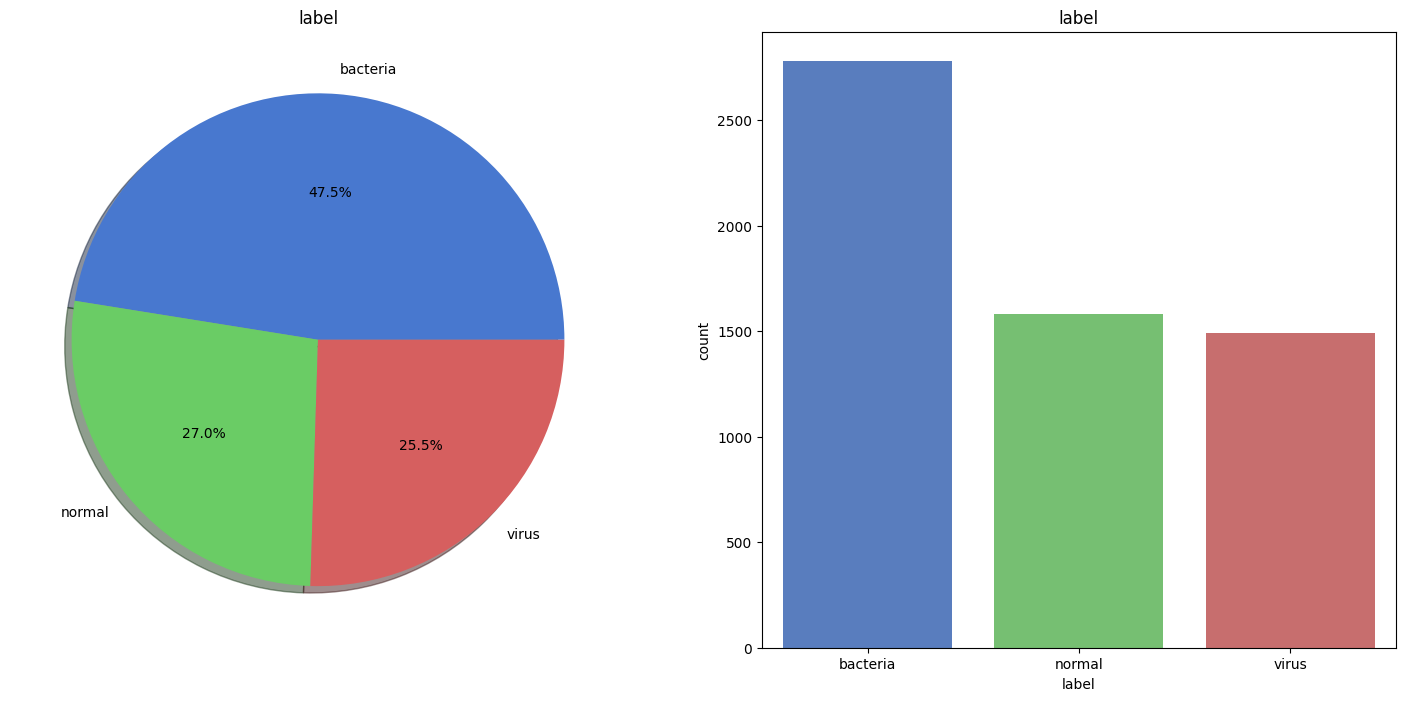

In [20]:
plot_counts(df,"label")

In [21]:
def plot_img_size(df,tar_var):
    # Extract the width and height columns from the DataFrame
    widths = df[tar_var].apply(lambda x: x[0])
    heights = df[tar_var].apply(lambda x: x[1])

    # Create a scatter plot of the image sizes
    plt.scatter(widths, heights)
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title("Image Sizes")
    plt.tight_layout()
    plt.show()

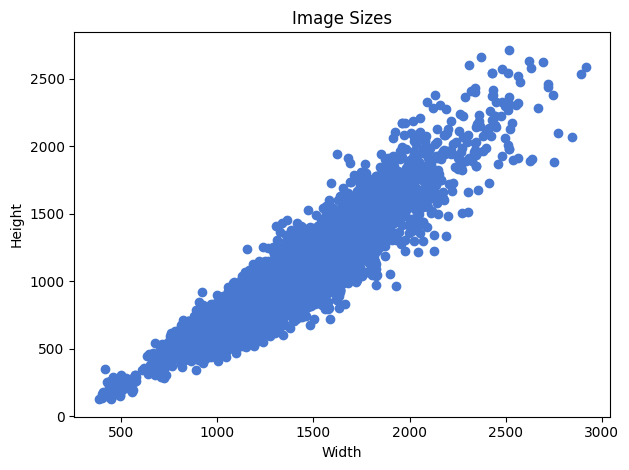

In [22]:
plot_img_size(df,"size")

In [23]:
df['aspect_ratio'].describe()

count    5856.000000
mean        1.442986
std         0.254356
min         0.835391
25%         1.261627
50%         1.415885
75%         1.585750
max         3.378788
Name: aspect_ratio, dtype: float64

In [24]:
def aspect_ratio_plot(df, tar_var:str,num_bins:int,range_min:float, range_max:float):
    # Create the histogram
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(df[tar_var], bins=num_bins, range=(range_min, range_max), density=False)

    # Add labels and title
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of Data')

    # Show the plot
    plt.show()

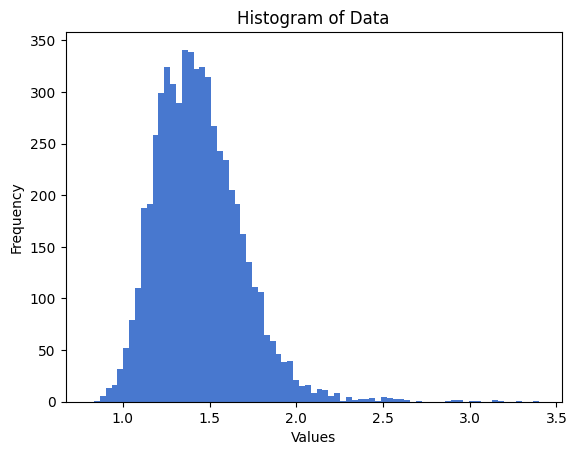

In [25]:
# Define the number of bins and range
num_bins = 77
range_min = 0.8
range_max = 3.4

aspect_ratio_plot(df,"aspect_ratio",num_bins,range_min,range_max)

In [53]:
def get_avg_color(file_path):
    # Load the image using OpenCV
    img = cv2.imread(file_path)
    # Reshape the image into an array with a shape of (width * height, 3)
    pixels = np.float32(img.reshape(-1, img.shape[-1]))
    # Run K-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    _, labels, centroids = cv2.kmeans(pixels, 1, None, criteria, 10, flags)
    # Convert the centroid values to integers
    dominant_color = np.uint8(centroids[0])
    # Compute the average color
    avg_color = np.mean(pixels, axis=0)
    avg_color = np.uint8(avg_color)
    return avg_color, dominant_color